In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from preprocessing_utils import *
from plotting_utils import *
from analysis_utils import *

%load_ext autoreload
%autoreload 2

# 1. Dataset Pre-Processing

Data loading and cleanup, decay channel classification, jet mass caculations. 

In [2]:
data_files = [
    "../datasets/data_A.4lep.root",
    "../datasets/data_B.4lep.root",
    "../datasets/data_C.4lep.root",
    "../datasets/data_D.4lep.root",
]

df_data = load_many_root_files(data_files, label="data", verbose=True)

Found TTrees:
  mini;1
Found TTrees:
  mini;1
Found TTrees:
  mini;1
Found TTrees:
  mini;1


In [3]:
signal_files = {
    "ggH": ["../datasets/mc_345060.ggH125_ZZ4lep.4lep.root"],
    "VBF": ["../datasets/mc_344235.VBFH125_ZZ4lep.4lep.root"],
    "WH":  ["../datasets/mc_341964.WH125_ZZ4lep.4lep.root"],
    "ZH":  ["../datasets/mc_341947.ZH125_ZZ4lep.4lep.root"],
}

df_signal = pd.concat(
    [
        load_many_root_files(files, label=proc)
        for proc, files in signal_files.items()
    ],
    ignore_index=True
)

total_mc_events = df_signal.shape[0]
total_mc_events

385706

In [4]:
df_bkg = load_many_root_files(
    ["../datasets/mc_363490.llll.4lep.root"],
    label="ZZ"
)

In [5]:
preproc_data = preprocess_events(df_data, is_mc=False) 
# Luminosity 10/fb in accordance with open dataset standards
preproc_sig = preprocess_events(df_signal, is_mc=True)
preproc_bkg = preprocess_events(df_bkg, is_mc=False)

preproc_sig

,eventNumber,lep_n,mcWeight,lep_pt_0,lep_eta_0,lep_phi_0,lep_E_0,lep_type_0,lep_charge_0,lep_pt_1,...,lep_phi_3,lep_E_3,lep_type_3,lep_charge_3,source_file,sample,channel,m4l,m4l_GeV,event_weight
0,65,4,28.485731,51905.457031,-0.925709,-2.774290,75779.648438,13,1,41248.570312,...,-2.495816,7739.273438,13,-1,../datasets/mc_345060.ggH125_ZZ4lep.4lep.root,ggH,4mu,122689.151637,122.689152,28.485731
1,295,4,28.485731,41430.644531,-1.233182,0.449031,77133.531250,13,-1,40307.167969,...,-2.957073,7826.770508,13,1,../datasets/mc_345060.ggH125_ZZ4lep.4lep.root,ggH,4mu,113659.180994,113.659181,28.485731
2,360,4,28.485731,33646.710938,-0.032324,-2.077223,33664.457031,13,1,27313.271484,...,-0.358869,54166.011719,13,-1,../datasets/mc_345060.ggH125_ZZ4lep.4lep.root,ggH,2e2mu,125399.949441,125.399949,28.485731
3,1678,4,28.485731,77118.562500,0.514764,0.115437,87563.773438,13,-1,27845.740234,...,2.122277,14952.772461,11,1,../datasets/mc_345060.ggH125_ZZ4lep.4lep.root,ggH,2e2mu,123645.117202,123.645117,28.485731
4,1071,4,28.485731,161909.218750,-1.037354,-0.161717,257122.468750,11,1,53367.753906,...,0.046575,19014.888672,11,-1,../datasets/mc_345060.ggH125_ZZ4lep.4lep.root,ggH,4e,123518.258187,123.518258,28.485731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385701,112856,4,1.000000,92831.593750,1.332783,1.701473,188231.000000,11,-1,73832.656250,...,1.232832,8083.720215,11,1,../datasets/mc_341947.ZH125_ZZ4lep.4lep.root,ZH,4e,123608.438762,123.608439,1.000000
385702,113024,4,1.000000,58890.425781,-0.353909,-1.488211,62617.226562,13,1,36526.355469,...,0.601485,17969.519531,11,1,../datasets/mc_341947.ZH125_ZZ4lep.4lep.root,ZH,2e2mu,131743.705819,131.743706,1.000000
385703,113056,4,1.000000,67050.062500,0.748966,-1.661723,86751.632812,11,-1,43340.984375,...,2.235598,8439.678711,13,-1,../datasets/mc_341947.ZH125_ZZ4lep.4lep.root,ZH,other,179714.787502,179.714788,1.000000
385704,111676,4,1.000000,71643.921875,-1.529965,-1.062832,173183.390625,11,1,27985.783203,...,-0.176543,31404.640625,13,-1,../datasets/mc_341947.ZH125_ZZ4lep.4lep.root,ZH,2e2mu,130489.834966,130.489835,1.000000


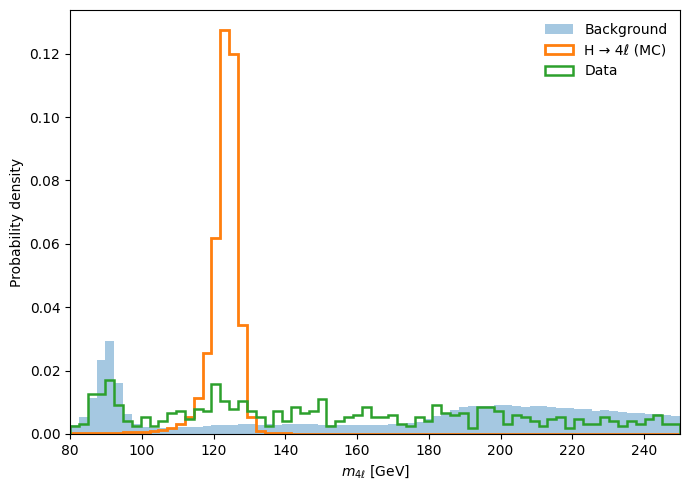

In [6]:
# Sanity check with unity normalization (shape only)

fig = plot_m4l_density(preproc_bkg, preproc_sig, preproc_data, n_bins=70)
plt.show()

# 2. Data Analysis

In [8]:
selections = define_selections()

preproc_data = add_zz_columns(preproc_data)
preproc_bkg  = add_zz_columns(preproc_bkg)
preproc_sig  = add_zz_columns(preproc_sig)

cutflow = build_cutflow(
    preproc_data,
    preproc_bkg,
    preproc_sig,
    selections, 
)

cutflow


,cut,data,bkg,sig
0,All events,832,554279.0,5415654.50
1,4_leptons,827,550307.0,5379829.00
2,pt_cuts,444,442763.0,3545349.25
3,has_ZZ,338,422722.0,3487644.75
4,Z1_window,293,375767.0,2525676.75
5,Z2_min,272,362568.0,2313968.50


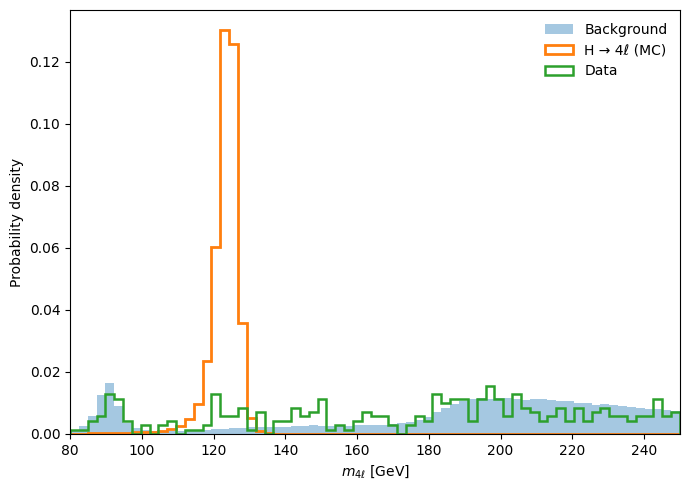

In [10]:
mask_data_pt = apply_selections(preproc_data, selections, upto="pt_cuts")
mask_bkg_pt  = apply_selections(preproc_bkg,  selections, upto="pt_cuts")
mask_sig_pt  = apply_selections(preproc_sig,  selections, upto="pt_cuts")

data_pt = preproc_data.loc[mask_data_pt]
bkg_pt  = preproc_bkg.loc[mask_bkg_pt]
sig_pt  = preproc_sig.loc[mask_sig_pt]

fig = plot_m4l_density(bkg_pt, sig_pt, data_pt,n_bins=70)

          cut  data       bkg         sig
0  All events   832  554279.0  5415654.50
1   4_leptons   827  550307.0  5379829.00
2     pt_cuts   444  442763.0  3545349.25
3      has_ZZ   338  422722.0  3487644.75
4   Z1_window   293  375767.0  2525676.75
5      Z2_min   272  362568.0  2313968.50


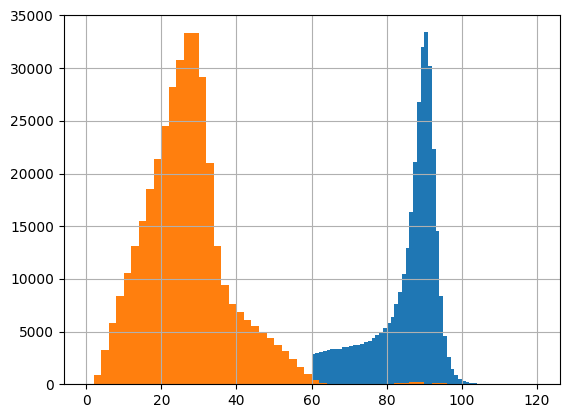

In [13]:
preproc_sig["mZ1_GeV"].hist(bins=60, range=(60,120))
preproc_sig["mZ2_GeV"].hist(bins=60, range=(0,120))
selections = define_selections()

cutflow = build_cutflow(
    preproc_data,
    preproc_bkg,
    preproc_sig,
    selections
)

print(cutflow)
